## DataRobot Internship Task

Loading the dataset:

In [1]:
import pandas as pd
data = pd.read_csv(r'sampled_data2.csv')
df = data.copy()

Noting the feature names for directly manipulating or analyzing these. 

In [2]:
print(data.columns.values)

['step' 'customer' 'age' 'gender' 'merchant' 'category' 'amount' 'fraud']


preview the data

In [3]:
data.head(10)

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0
5,2021-03-27,C34676686,26to35,Male,M348934600,Transportation,32.61,0
6,2021-03-18,C760368405,36to45,Male,M980657600,Sports&Toys,410.67,1
7,2021-07-16,C1655037147,26to35,Female,M480139044,Health,16.45,1
8,2021-05-13,C1789457872,26to35,Female,M3697346,Leisure,300.62,1
9,2021-07-23,C477542874,26to35,Female,M85975013,Groceries,47.47,0


get basic information of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      25200 non-null  object 
 1   customer  25200 non-null  object 
 2   age       25200 non-null  object 
 3   gender    25200 non-null  object 
 4   merchant  25200 non-null  object 
 5   category  25200 non-null  object 
 6   amount    25200 non-null  float64
 7   fraud     25200 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


We can see that we have 8 columns, each column has 25200 non-null rows, this can mean that their is a high probability that the dataset has no null values, but it's better to check. Of the 8 columns/features only 2 are numerical while the rest are categorical.

checking for null values

In [5]:
data.isnull().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

this shows that there are no null values in the dataset

In [6]:
data.describe()

,amount,fraud
count,25200.000000,25200.000000
mean,174.212506,0.285714
std,501.116240,0.451763
min,0.000000,0.000000
25%,17.720000,0.000000
50%,36.340000,0.000000
75%,109.180000,1.000000
max,8329.960000,1.000000


In [7]:
data.describe(include = 'O')

,step,customer,age,gender,merchant,category
count,25200,25200,25200,25200,25200,25200
unique,180,4061,8,4,48,14
top,2021-06-18,C1350963410,26to35,Female,M1823072687,Transportation
freq,177,147,7984,14596,9192,15925


It can be noticed that the age column has varied values thus scaling is required. Also the gender column might have an unknown attribute as it has 4 unique values or it might be some human error which needs to be corrected. Also there are many values of the same attribute (female in gender and transportation in category) which might lead to skewed results without techniques for addressing overfitting.

In [8]:
#checking the attributes of gender
print(data.gender.unique())

['Male' 'Female' 'Enterprise' 'Unknown']


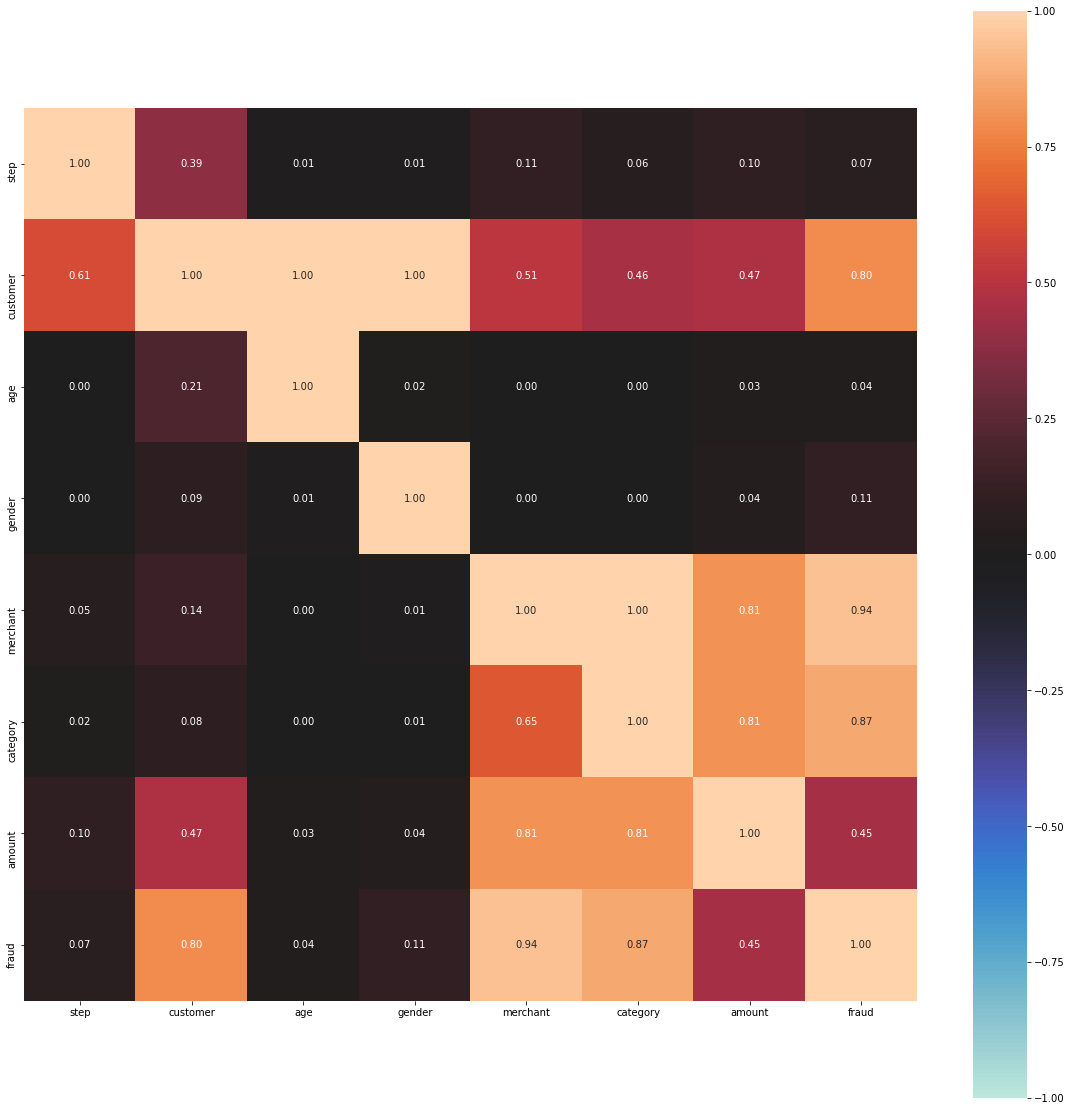

{'corr':               step  customer       age    gender  merchant  category  \
 step      1.000000  0.390616  0.014808  0.010605  0.107360  0.057168   
 customer  0.605403  1.000000  1.000000  1.000000  0.508105  0.458672   
 age       0.004728  0.205996  1.000000  0.019601  0.003319  0.001807   
 gender    0.001423  0.086573  0.008237  1.000000  0.002983  0.003207   
 merchant  0.046917  0.143268  0.004542  0.009716  1.000000  1.000000   
 category  0.016173  0.083724  0.001601  0.006763  0.647370  1.000000   
 amount    0.099530  0.470454  0.028884  0.043971  0.811395  0.805309   
 fraud     0.067233  0.796446  0.038085  0.105551  0.944918  0.870595   
 
             amount     fraud  
 step      0.099530  0.067233  
 customer  0.470454  0.796446  
 age       0.028884  0.038085  
 gender    0.043971  0.105551  
 merchant  0.811395  0.944918  
 category  0.805309  0.870595  
 amount    1.000000  0.450215  
 fraud     0.450215  1.000000  ,
 'ax': <AxesSubplot:>}

In [9]:
#correlation plot of features using theil's u method to correlate both categorical and numerical features 
from dython.nominal import associations
associations(data, theil_u=True, figsize=(20, 20))

The correlation plot shows some expected and some weird properties. Both Customer and Merchant are highly correlated with the target column, this might mean that some merchants have repeatedly conned people and some customers have been repeatedly cheated. Also very strangely enough the customer column is 100% corelated with age which seems to be a mistake. Also amount of a purchase is moderately correlated to fraud against my initial thought. And the column age is very weakly correlated to fraud against the common beleif that old people are more likely to cheated

In [10]:
data[["merchant", "fraud"]].groupby(['merchant'], as_index=False).mean().sort_values(by='fraud', ascending=False)

,merchant,fraud
24,M2080407379,1.000000
30,M3697346,1.000000
2,M1294758098,1.000000
42,M857378720,1.000000
33,M495352832,1.000000
47,M980657600,0.993923
38,M732195782,0.992337
19,M1873032707,0.990826
5,M1353266412,0.984615
12,M17379832,0.983425


This shows that there are 17 merchants who have conned people more than 90% of times and 18 merchants have never done fraud

In [11]:
data[["category", "fraud"]].groupby(['category'], as_index=False).mean().sort_values(by='fraud', ascending=False)

,category,fraud
7,Leisure,1.000000
13,Travel,0.993127
10,Sports&Toys,0.971569
6,HotelServices,0.935154
8,OtherServices,0.908367
5,Home,0.870317
4,Health,0.796992
11,Technology,0.738318
0,Beauty&Wellness,0.605907
9,Restaurants&Bars,0.405405


This shows that high spending categories like leisure, travel, sports and toys have been involved in fraud most number of times, with leisure purchases always being fraud. This means that fraud is likely to be nicely correlated to a combination of category and amount

C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

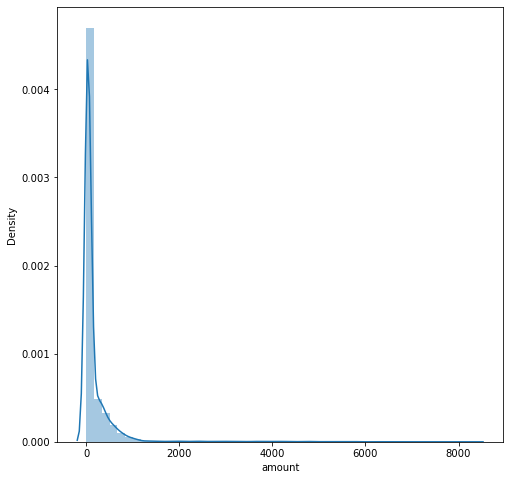

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(8, 8))
sns.distplot(data['amount'])

The distanceplot of amount is extremely left skewed and the frequency of values starts becoming very less from around 1000

As seen in the data description, the age column has object values of a particular age band, let us replace that with the upper limit of the groups 

In [24]:
for i in range(0, len(data)):
    if (data['age'].loc[i] == '36to45'):
        data['age'].loc[i] = 45
    if (data['age'].loc[i] == '26to35'):
        data['age'].loc[i] = 35
    if (data['age'].loc[i] == '56to65'):
        data['age'].loc[i] = 65
    if (data['age'].loc[i] == '19to25'):
        data['age'].loc[i] = 25
    if (data['age'].loc[i] == '46to55'):
        data['age'].loc[i] = 55
    if (data['age'].loc[i] == 'gt65'):
        data['age'].loc[i] = 100
    if (data['age'].loc[i] == 'Unknown'):
        data['age'].loc[i] = 0
    if (data['age'].loc[i] == 'lt18'):
        data['age'].loc[i] = 18
data['age'] = data['age'].astype(int)

C:\Users\MAYUR Shah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Feature Engineering

In [25]:
data['meramt'] = data.groupby('merchant')['amount'].transform(lambda x: x.mean())

In [26]:
data['catamt'] = data.groupby('category')['amount'].transform(lambda x: x.mean())

In [27]:
data['custamt'] = data.groupby('customer')['amount'].transform(lambda x: x.mean())

In [28]:
for i in range(0,len(data)):
    data['customer'].loc[i] = data['customer'].loc[i].replace("C","")
    data['customer'].loc[i] = int(data['customer'].loc[i])

for i in range(0,len(data)):
    data['merchant'].loc[i] = data['merchant'].loc[i].replace("M","")
    data['merchant'].loc[i] = int(data['merchant'].loc[i])

In [29]:
data['mercat'] = data.groupby('category')['merchant'].transform(lambda x: x.mean())

In [30]:
data['custcat'] = data.groupby('category')['customer'].transform(lambda x: x.mean())

In [35]:
data['catage'] = data.groupby('category')['age'].transform(lambda x: x.mean())

The first three features are based on previous observations of dependence of amount with the other features. The last three features might seem funny but are based on correlation and might make sense mathematically. <br>
Let's revisualize the correlation plot

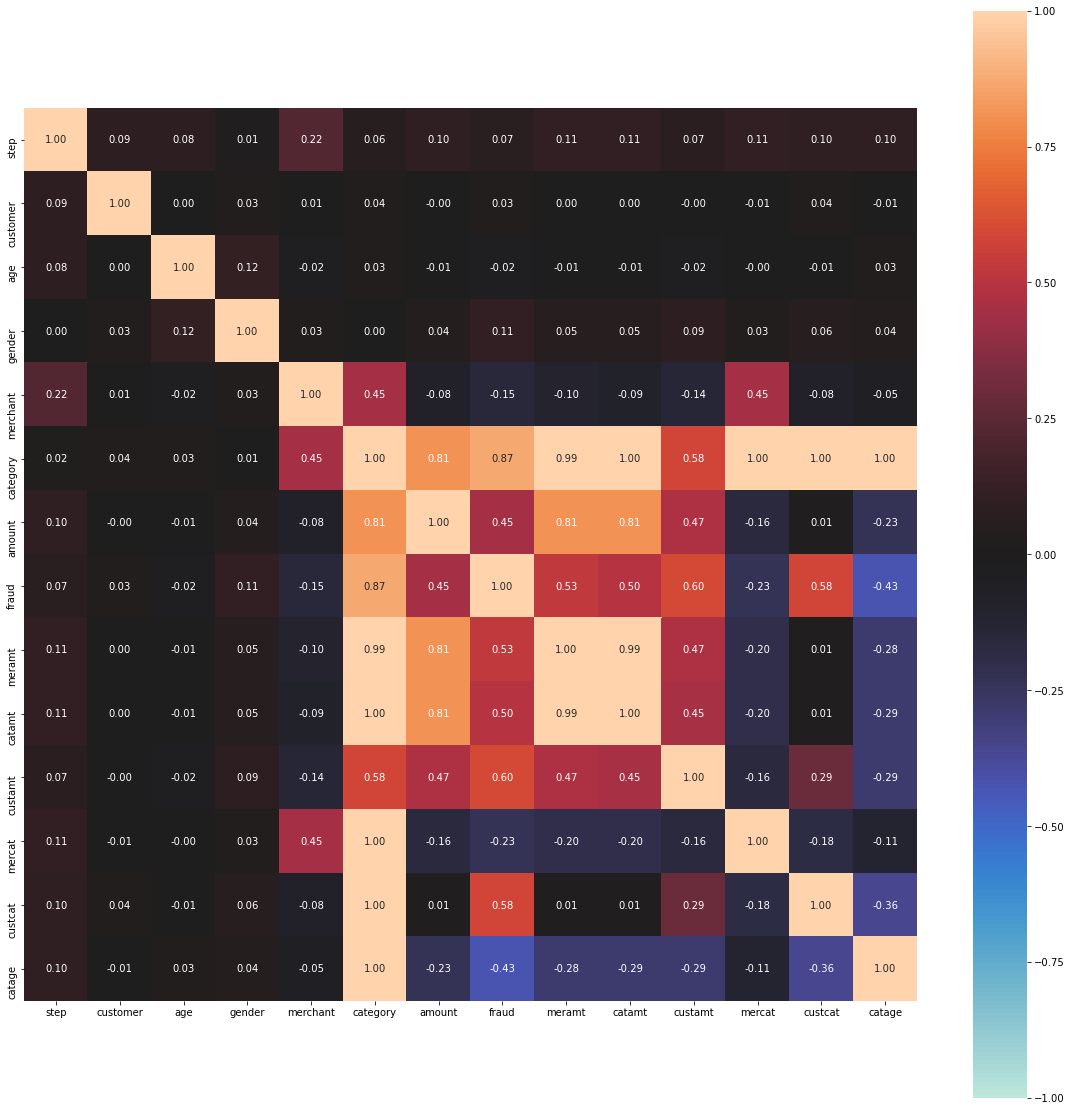

{'corr':               step  customer       age    gender  merchant  category  \
 step      1.000000  0.091561  0.081676  0.010605  0.218892  0.057168   
 customer  0.091561  1.000000  0.002931  0.032947  0.006908  0.035071   
 age       0.081676  0.002931  1.000000  0.115579 -0.020316  0.032859   
 gender    0.001423  0.032947  0.115579  1.000000  0.026731  0.003207   
 merchant  0.218892  0.006908 -0.020316  0.026731  1.000000  0.449156   
 category  0.016173  0.035071  0.032859  0.006763  0.449156  1.000000   
 amount    0.099530 -0.000815 -0.011677  0.043971 -0.082459  0.805309   
 fraud     0.067233  0.026313 -0.018114  0.105551 -0.150286  0.870595   
 meramt    0.109209  0.001455 -0.009584  0.053934 -0.101626  0.992498   
 catamt    0.107599  0.000476 -0.009397  0.050372 -0.090733  1.000000   
 custamt   0.071864 -0.001731 -0.024820  0.093464 -0.135225  0.581235   
 mercat    0.106171 -0.006412 -0.003669  0.026906  0.449156  1.000000   
 custcat   0.099459  0.035071 -0.011782  0.

In [36]:
from dython.nominal import associations
associations(data, theil_u=True, figsize=(20, 20))

As we can see our features have a nice correlation with the target

C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

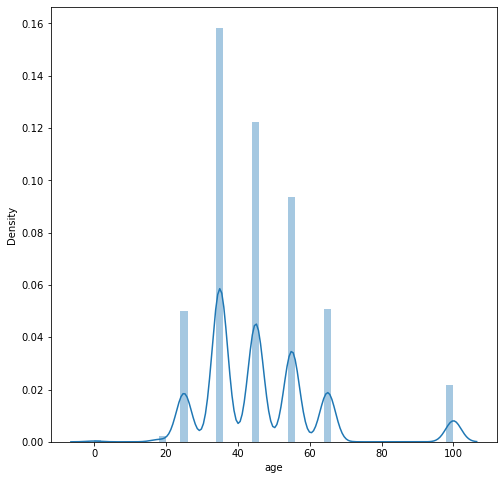

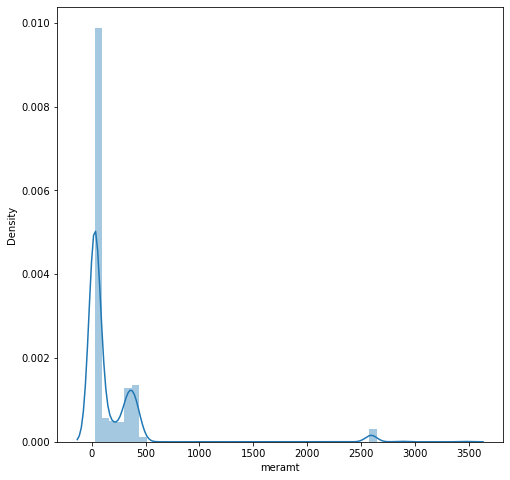

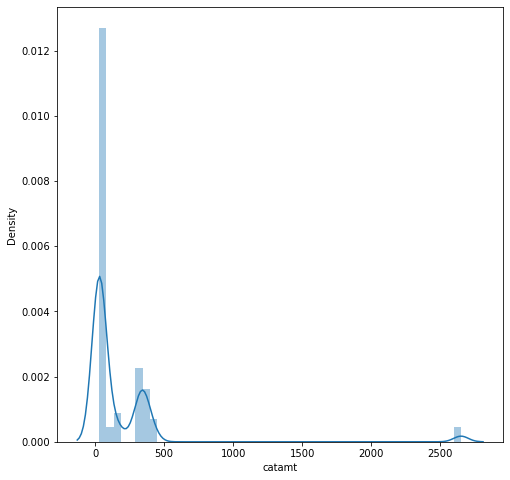

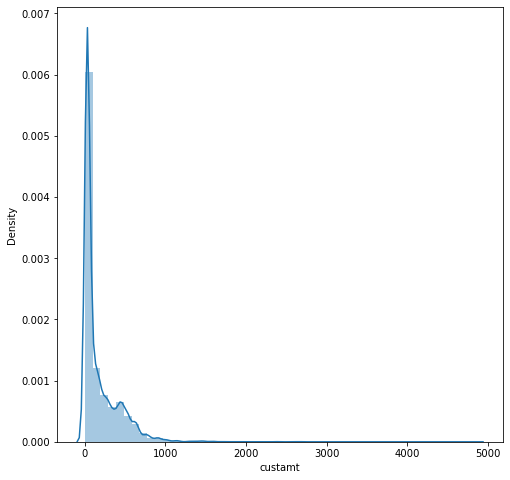

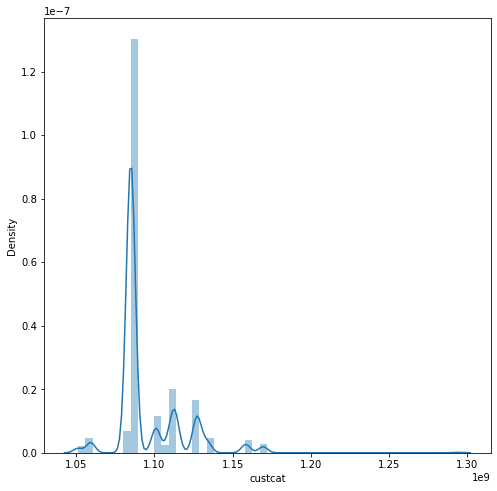

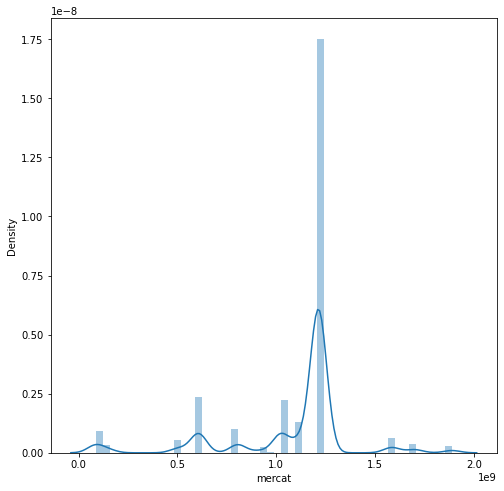

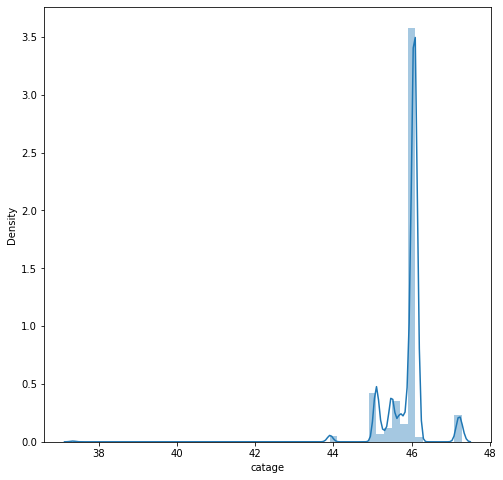

In [37]:
l = ['age', 'meramt', 'catamt', 'custamt', 'custcat', 'mercat', 'catage']
for i in l:
    plt.figure(figsize=(8, 8))
    sns.distplot(data[i])

We can see that except age all the features are skewed, of which catage and mercat are negatively skewed and others are positively skewed

It can be seen that the data has outliers, however the number of outliers is significant. Thus we wont remove them

C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAYUR Shah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

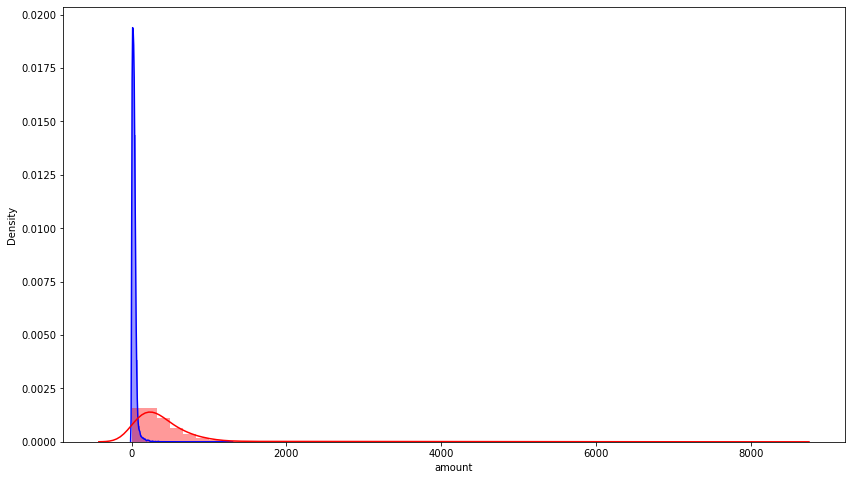

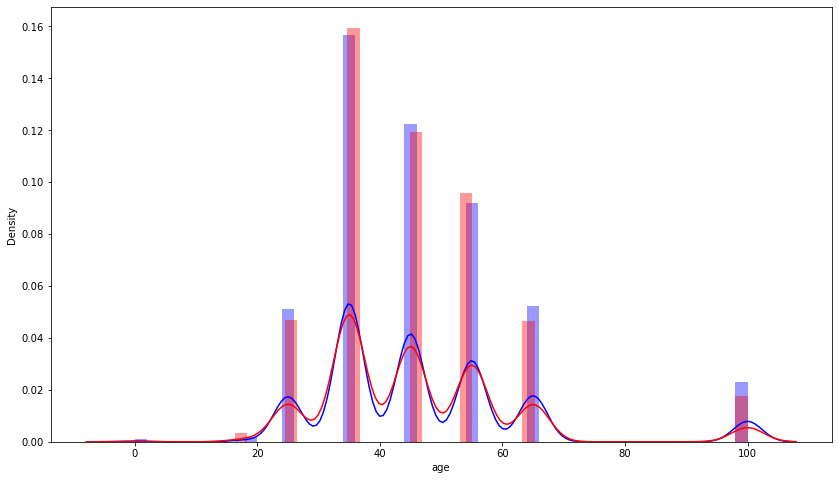

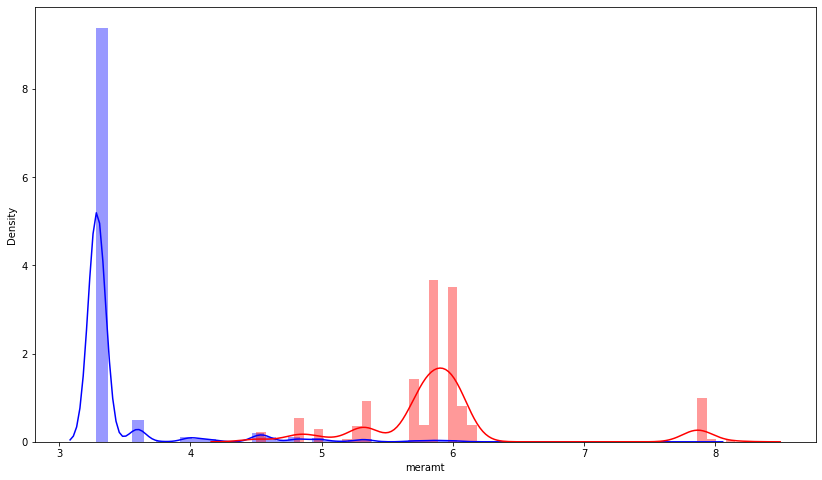

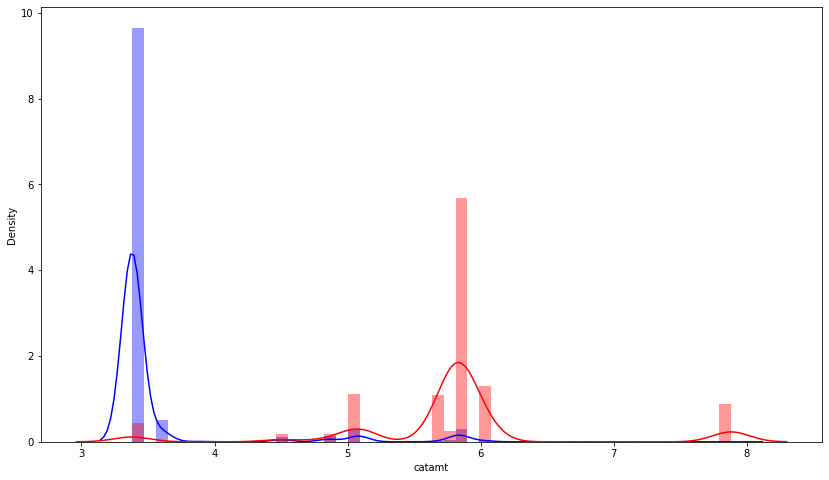

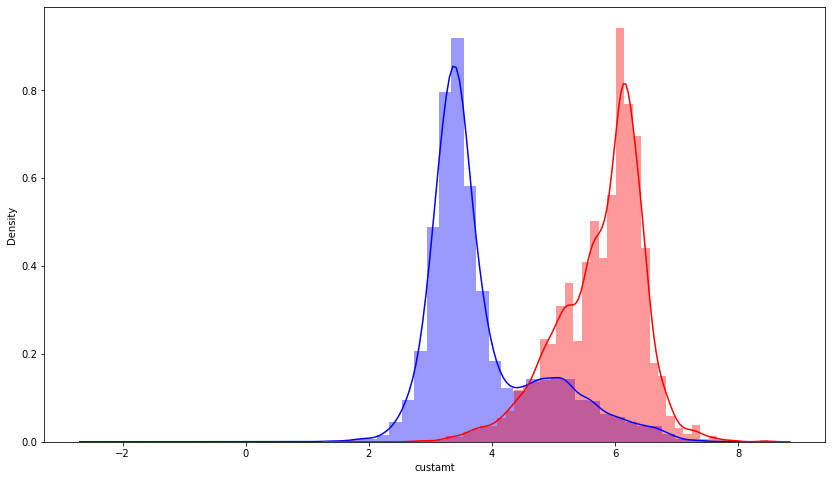

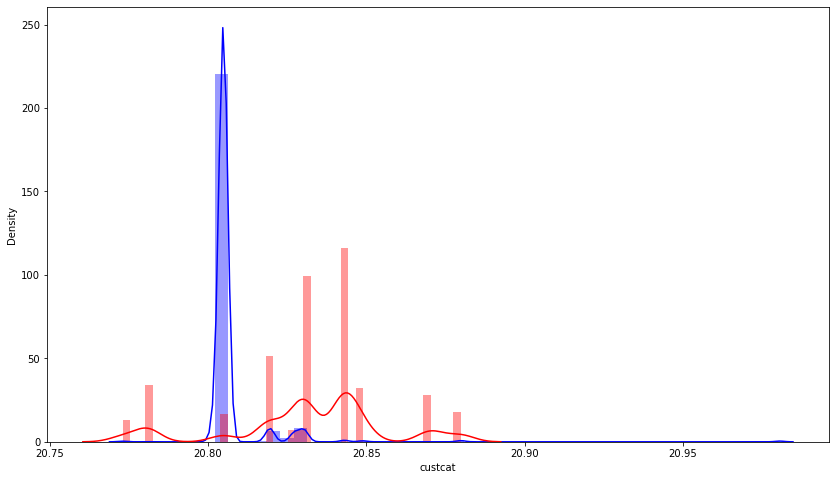

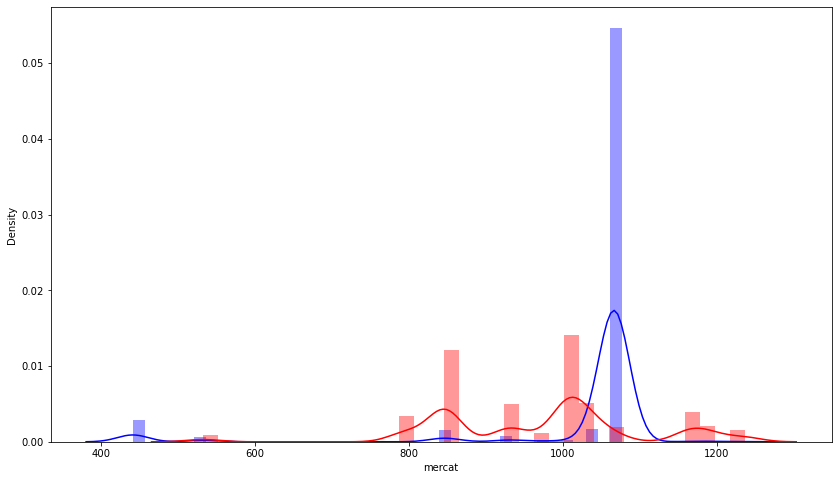

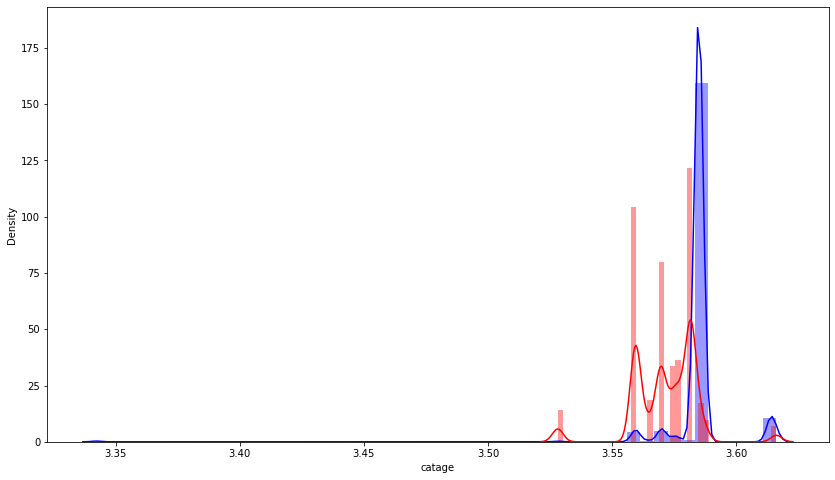

In [77]:
l = ['amount','age', 'meramt', 'catamt', 'custamt', 'custcat', 'mercat', 'catage']
for i in l:
    plt.figure(figsize=(14, 8))
    sns.distplot(data[df['fraud'] == 0][i],color = 'blue')
    sns.distplot(data[df['fraud'] == 1][i],color = 'red')

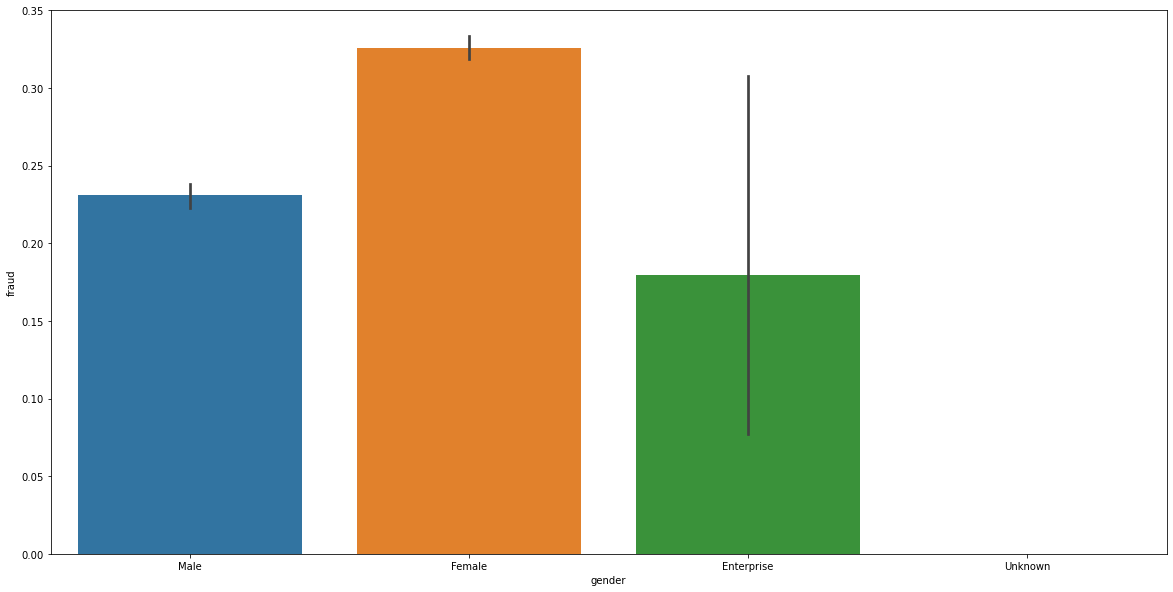

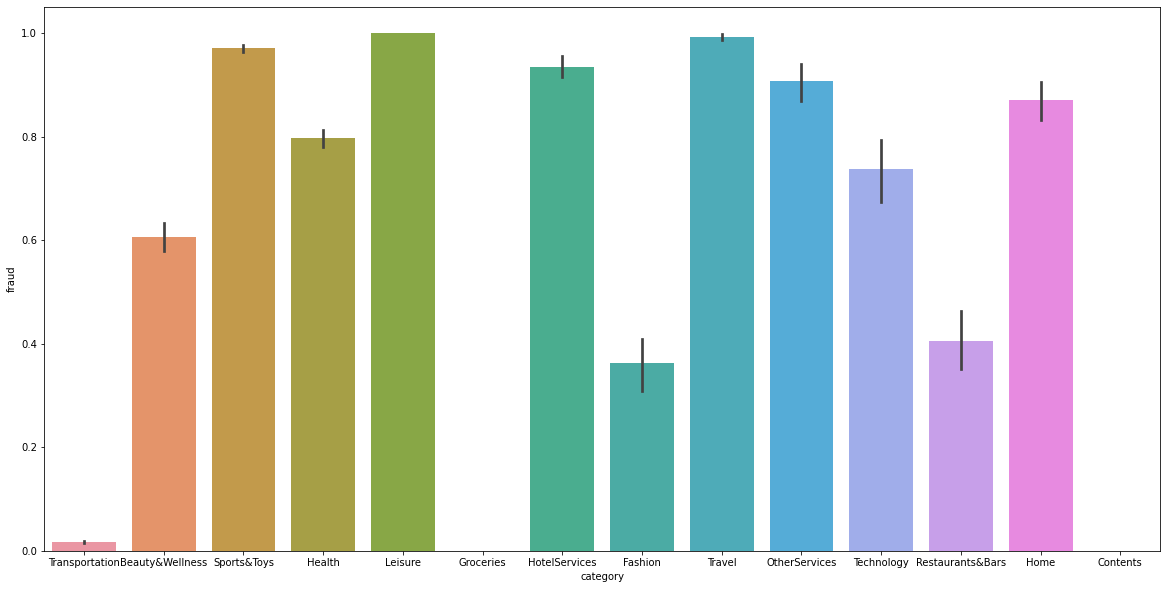

In [80]:
for i in ['gender', 'category']:
    plt.figure(figsize=(20, 10))
    sns.barplot(x = i,
                y = df['fraud'],
                data = data)

In the numerical column the values which were fraund and those which were not visibily seperated after a certain value, clearly showing patterns with the exception of age column. The gender column is an interesting one as it tells that the number of females being cheated is significantly higher

In [40]:
#adjusting skewness
import numpy as np
data['meramt'] = np.log((data['meramt'] + 0.00000001))

In [41]:
data['catamt'] = np.log((data['catamt'] + 0.00000001))

In [42]:
data['custcat'] = np.log((data['custcat'] + 0.00000001))

In [43]:
data['custamt'] = np.log((data['custamt'] + 0.00000001))

In [45]:
data['mercat'] = (data['mercat'])**(1/3)

In [46]:
data['catage'] = (data['catage'])**(1/3)

In [47]:
import numpy as np
filtered = data.dtypes[data.dtypes == np.object]
colname = []
colname = list(filtered.index)
print(colname)

['step', 'customer', 'gender', 'merchant', 'category']


In [48]:
data = data.drop('fraud', axis = 1)

In [49]:
data_num = data.drop(colname, axis = 1)

In [50]:
data_cat = data[colname]

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [52]:
data_imp = imputer.transform(data_num)

In [53]:
data_tra = pd.DataFrame(data_imp, columns=data_num.columns,
                          index=data.index)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_tra)

StandardScaler()

In [55]:
scale_train = scaler.transform(data_tra)

In [56]:
data_sc = pd.DataFrame(scale_train, columns=data_tra.columns,
                          index=data_num.index)

In [57]:
data_cat = data_cat.drop(['customer', 'step'], axis = 1)

In [58]:
data_cat_encoded = pd.get_dummies(data_cat)

In [59]:
data_join = pd.concat([data_sc, data_cat_encoded], axis = 1)

In [60]:
data_join.shape

(25200, 74)

Above we have imputed and scaled the features, imputation is not necessary in this case as there is no missing value present, yet I have used it just to show end-to-end data science pipeline as asked in the task. <br>
After this we have one-hot encoded the categorical features and dropped customer and step colimns as given in the assignment notebook

In [61]:
from sklearn.model_selection import train_test_split
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(data_join, y, test_size=0.75, random_state=42,stratify=y)

In [62]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [63]:
y_pred = forest_reg.predict(X_test)
y_prediction = forest_reg.predict_proba(X_test)

0.9971902606310015
[[13272   228]
 [  142  5258]]


<AxesSubplot:>

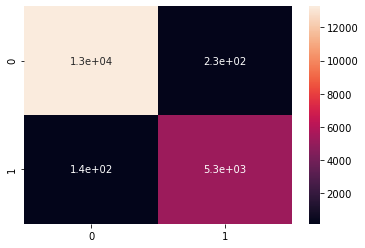

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

if df['fraud'].nunique()> 2:
    rules_score = roc_auc_score(y_test, y_prediction[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, y_prediction[:,1])

print(rules_score)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

As seen above just with simple feature engineering we reduced 79 false positives and improved roc score. Let's use regularization by cross validation to see what happens

In [65]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [66]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, X_test, y_test,
                                scoring="roc_auc", cv=10)
display_scores(forest_scores)

Scores: [0.99759259 0.99767215 0.99580316 0.99845885 0.99724417 0.99762346
 0.99698217 0.99722977 0.99861934 0.99639575]
Mean: 0.9973621399176956
Standard deviation: 0.0008087641314100779


In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cm_score = cross_val_predict(forest_reg, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, cm_score)
print(conf_mat)

[[13288   212]
 [  130  5270]]


As we can see that with 10 fold cross validation we get the roc score with a maximum value of <b>0.99861934</b> and reduce the number of false positives to <b>212</b>

The hyperparameters for this model were tuned using Random Search, and gave an roc score of <b>0.99989934</b> however it worsened the false positive number, which is why we have chosen the base model itself